In [1]:
import  tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
lt = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]

from tensorflow.keras.applications import*
from tensorflow.keras.models import*
from tensorflow.keras.layers import*
from tensorflow.keras.utils import load_img
It= [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE, cv2. ROTATE_90_CLOCKWISE]
def brightness(img):
  value = random. uniform(0.5, 2)
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  hsv[:, :, 1] = hsv[:, :, 1] * value
  hsv[:, :, 1][hsv[:, :, 1] > 255] = 255
  hsv[:, :, 2] = hsv[:, :, 2] * value
  hsv[:, :, 2][hsv[:, :, 2] > 255] = 255
  hsv = np.array(hsv, dtype=np.uint8)
  img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
  return img
from google.colab import drive
drive.mount('/content/drive')
import pathlib
import glob
directory=pathlib.Path("/content/drive/My Drive/dataset_IND")
resultant="/content/augmentedimages"
items = os.listdir(directory)
classes=[]
count=0
images = []
labels=[]
for i in items:
    i1=0
    print(i)
    classes.append(i)
    path1 = f"{directory}/{i}"
    a = random.randint(5,10)
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    k = i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)

i1+=1
while a!=0:
    img = cv2.rotate(img,lt[random.randint(0,2)])
    images .append(img)
    cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
    i1+=1
    labels.append(count)
    if a%2==0:
        img = brightness(img)
        images.append (img)
        cv2.imwrite(f"{resultant}\{k}{i1}.png", img)
        i1+=1
        labels.append (count)
    a-=1
count+=1
images = np.array(images)
labels = np.array(labels)
images .shape
(151, 224, 224, 3)

from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import *
from keras.applications.vgg16 import VGG16, preprocess_input

# change the model here for alternatives
model = VGG16(weights="imagenet")
for i in model.layers:
    i.trainable = False
len(model.layers)
model. summary()
transferVGG = Sequential()

for i in range(18):
    transferVGG.add(model.layers[i])

# adding custum layers
transferVGG.add(Flatten())
transferVGG.add(Dense(512,activation="relu"))
transferVGG.add(Dense(128,activation="relu"))
transferVGG. add(Dense(13,activation="Softmax"))

transferVGG. summary()
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if(logs.get('accuracy') > .99):
              print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))
              self.model.stop_training = True
callbacks = myCallback()

Mounted at /content/drive
virat.jpg
rohith sharma.jpg
jadeja.jpg
Ravichandran.jpg
gill.jpg
Mohammed_Siraj.jpg
bumrah.jpg
chahal.jpg
shreyas.jpg
AmbatiRayudu.jpg
dhoni.jpg
553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                     

In [4]:
transferVGG.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
transferVGG.fit(images, labels, epochs=100, callbacks=[callbacks])


Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 17.9386 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000call

Reached 99.00% accuracy, so stopping training!!
1/1 [==============================] - 5s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [5]:
transferVGG.evaluate(images, labels)

1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [6]:
def predict(i,transferVGG, labels):
    path1 = f"{directory}/{i}"
    img = cv2.imread(path1)
    img = cv2.resize(img, (224,224))
    a = np.argmax(transferVGG.predict(np.array([img])))
    img = cv2.putText(img, labels[a], (25,25), cv2.FONT_HERSHEY_SIMPLEX,1, (225,225,0), 3, cv2.LINE_AA)
    plt.imshow(img)

1/1 [==============================] - 1s 714ms/step


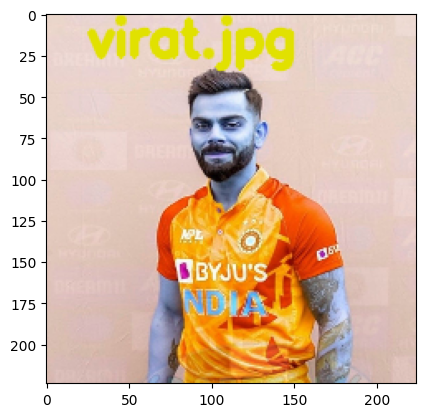

In [7]:
predict("virat.jpg",transferVGG, classes)